# Lending Club Loan Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.shape

(9578, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [8]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Task 1: Feature Transformation

#### Transform categorical values into numerical values (discrete)

In [9]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

## Task 2: Exploratory data analysis of different factors of the dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='credit.policy', ylabel='not.fully.paid'>

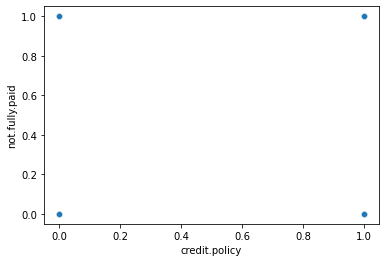

In [12]:
sns.scatterplot(data['credit.policy'], data['not.fully.paid'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

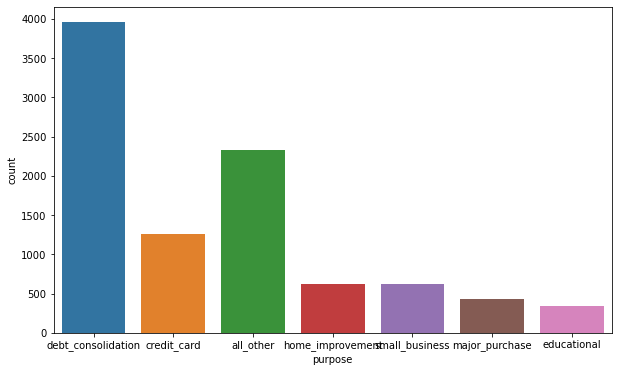

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data['purpose'])

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

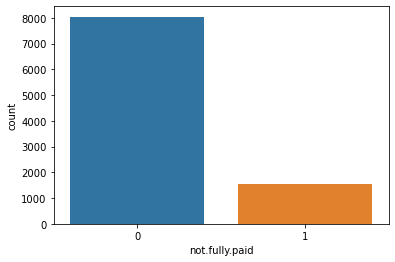

In [15]:
sns.countplot(data['not.fully.paid'])

<AxesSubplot:xlabel='purpose', ylabel='not.fully.paid'>

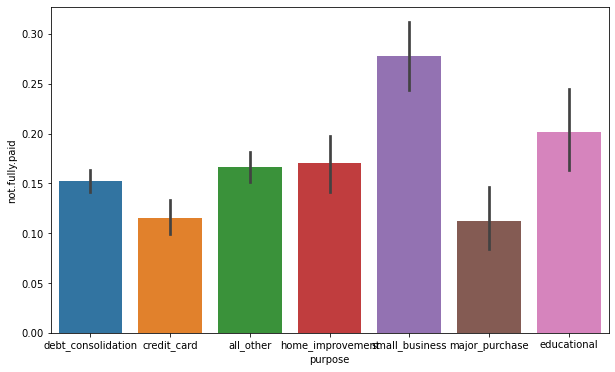

In [17]:
plt.figure(figsize = (10,6))
sns.barplot(data['purpose'] , data['not.fully.paid'])

<AxesSubplot:xlabel='purpose', ylabel='count'>

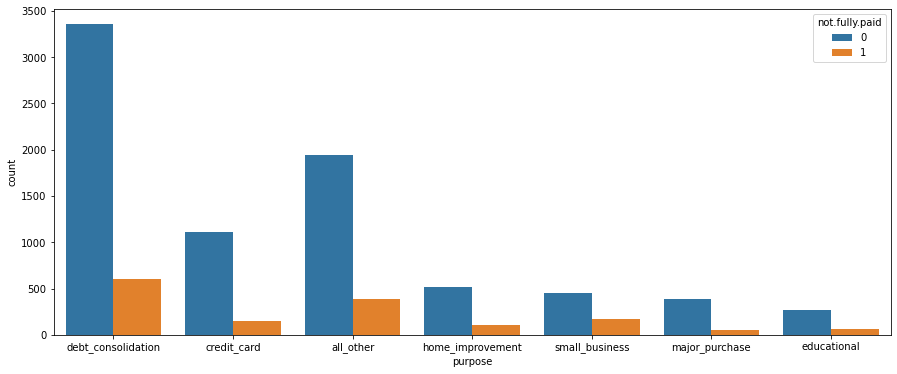

In [20]:
plt.figure(figsize = (15,6))
sns.countplot(data['purpose'] , hue = data['not.fully.paid'])

In [21]:
order_purpose = sorted(data['purpose'].unique())

<AxesSubplot:xlabel='purpose', ylabel='count'>

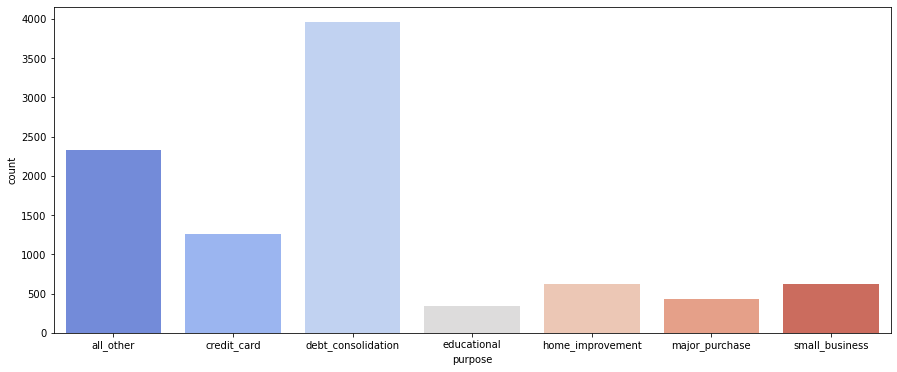

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(data['purpose'] , order = order_purpose , palette = 'coolwarm')

<AxesSubplot:xlabel='inq.last.6mths', ylabel='count'>

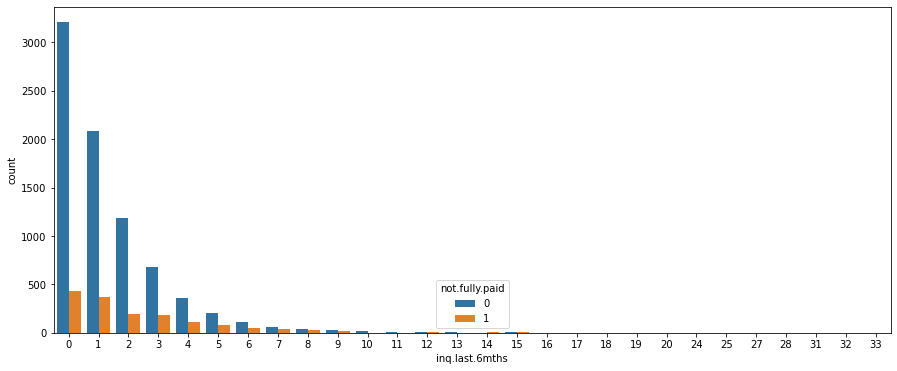

In [25]:
plt.figure(figsize = (15,6))
sns.countplot(data['inq.last.6mths'] , hue = data['not.fully.paid'])

<AxesSubplot:xlabel='delinq.2yrs', ylabel='count'>

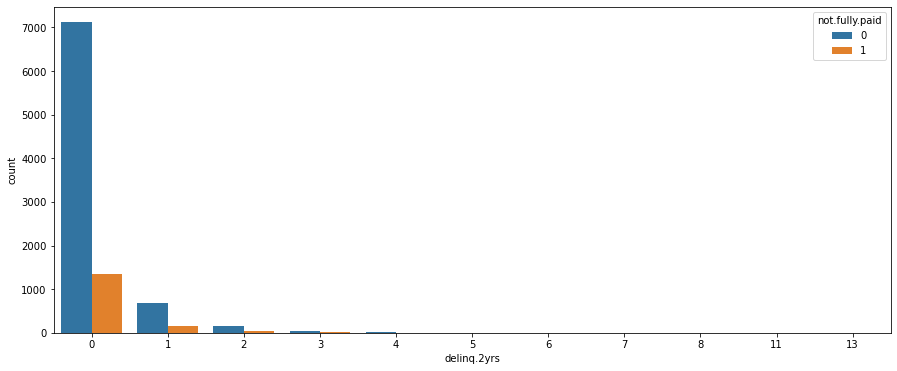

In [26]:
plt.figure(figsize = (15,6))
sns.countplot(data['delinq.2yrs'] , hue = data['not.fully.paid'])

<AxesSubplot:xlabel='pub.rec', ylabel='count'>

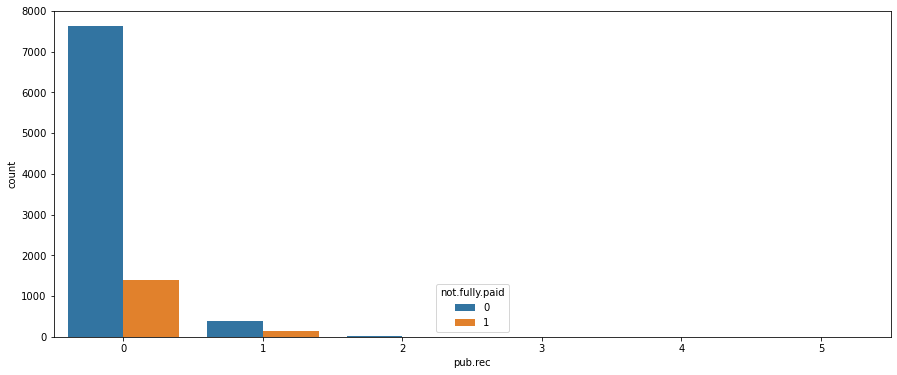

In [27]:
plt.figure(figsize = (15,6))
sns.countplot(data['pub.rec'] , hue = data['not.fully.paid'])

<AxesSubplot:xlabel='dti', ylabel='Density'>

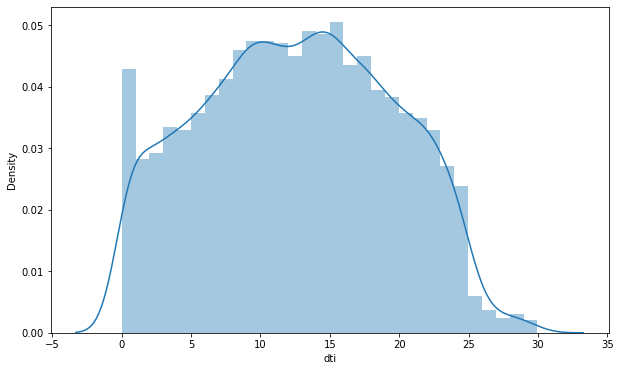

In [28]:
plt.figure(figsize = (10,6))
sns.distplot(data['dti'])

<AxesSubplot:xlabel='dti', ylabel='installment'>

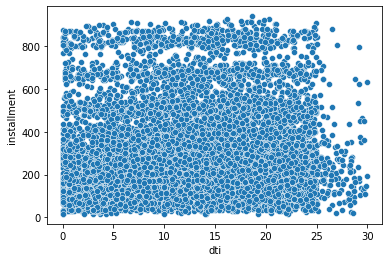

In [29]:
sns.scatterplot(x = data['dti'], y = data['installment'])

<AxesSubplot:xlabel='fico', ylabel='count'>

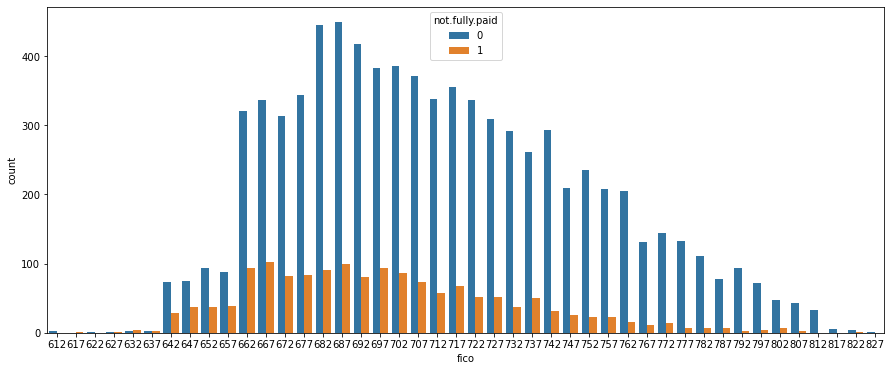

In [31]:
plt.figure(figsize = (15,6))
sns.countplot(data['fico'] , hue = data['not.fully.paid'])

### Data Engineering

In [32]:
data['annual_income'] = np.exp(data['log.annual.inc'])

In [33]:
data['annual_income'].head()

0    85000.000385
1    65000.000073
2    31999.999943
3    85000.000385
4    80799.999636
Name: annual_income, dtype: float64

In [36]:
data['debt_amount'] = data['dti'] * data['annual_income']

In [37]:
data['debt_amount'].head()

0    1.655800e+06
1    9.288500e+05
2    3.721600e+05
3    6.885000e+05
4    1.209576e+06
Name: debt_amount, dtype: float64

#### EDA continuation

In [40]:
data.drop('log.annual.inc', axis = 1, inplace = True)

<AxesSubplot:xlabel='annual_income', ylabel='installment'>

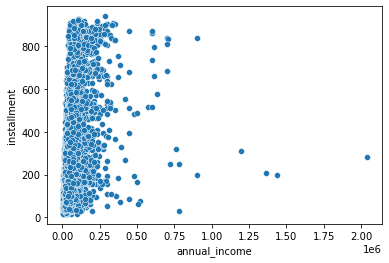

In [42]:
sns.scatterplot(x = data['annual_income'], y = data['installment'])

<AxesSubplot:xlabel='debt_amount', ylabel='installment'>

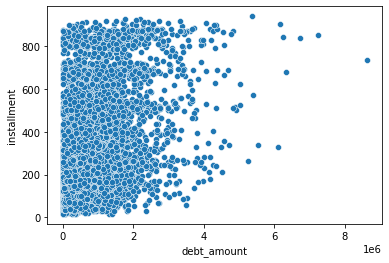

In [43]:
sns.scatterplot(x = data['debt_amount'], y = data['installment'])

<AxesSubplot:xlabel='not.fully.paid', ylabel='debt_amount'>

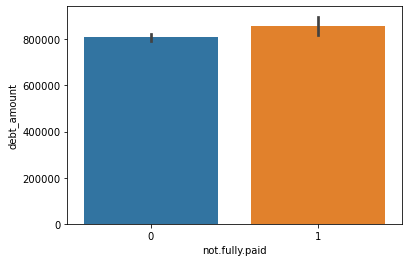

In [44]:
sns.barplot(data['not.fully.paid'] , data['debt_amount'])

In [45]:
data.groupby('not.fully.paid')['debt_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,808093.430451,675243.778607,0.0,347999.998465,668520.002977,1.079001e+06,8.634000e+06
1,1533.0,858040.596742,777545.251348,0.0,338541.840652,674540.000696,1.131840e+06,7.257600e+06


## Task 3 : Additional Feature Engineering

#### Checking the correlation between features and will drop those features which have a strong correlation


<AxesSubplot:>

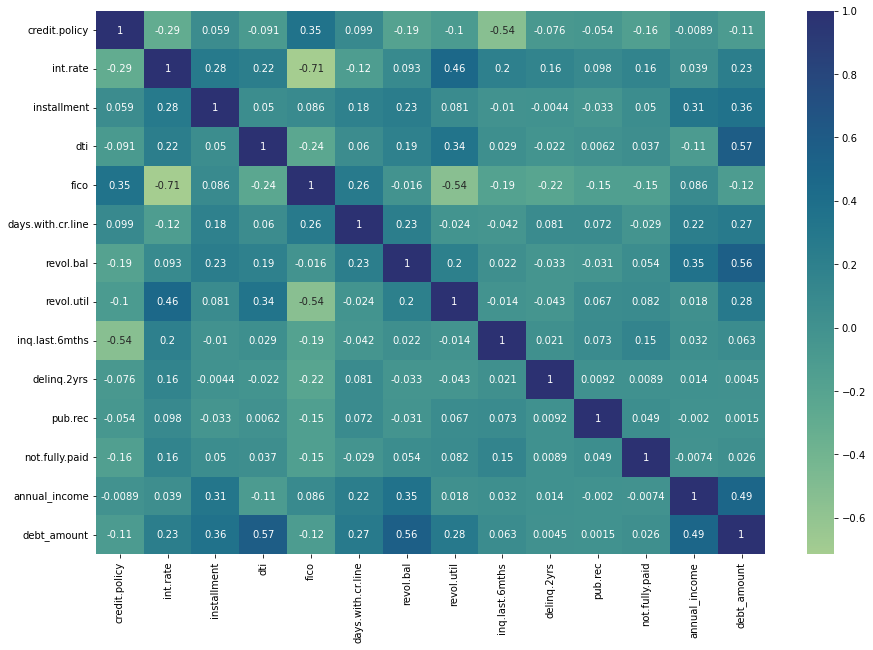

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap="crest")

##### Result : There is no highly correlated features. So no features can be dropped

<AxesSubplot:>

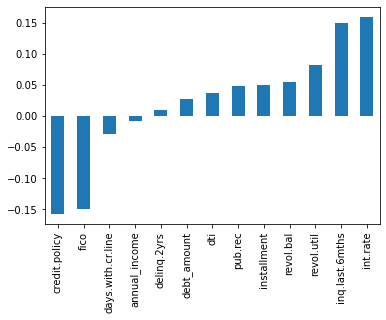

In [46]:
data.corr()['not.fully.paid'].sort_values().drop('not.fully.paid').plot(kind='bar')

In [48]:
data.groupby('purpose')['not.fully.paid'].value_counts()

purpose             not.fully.paid
all_other           0                 1944
                    1                  387
credit_card         0                 1116
                    1                  146
debt_consolidation  0                 3354
                    1                  603
educational         0                  274
                    1                   69
home_improvement    0                  522
                    1                  107
major_purchase      0                  388
                    1                   49
small_business      0                  447
                    1                  172
Name: not.fully.paid, dtype: int64

#### Task 1 : Data Transformation

In [49]:
df = pd.get_dummies(data['purpose'] , drop_first = True)

In [50]:
df1 = pd.concat([df,data] , axis = 1)

In [51]:
df1.columns

Index(['credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business', 'credit.policy', 'purpose',
       'int.rate', 'installment', 'dti', 'fico', 'days.with.cr.line',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'annual_income', 'debt_amount'],
      dtype='object')

In [52]:
df1.drop('purpose' , axis = 1, inplace = True)

## Task 4: Modelling

### Test Train split

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
X = df1.drop('not.fully.paid' , axis = 1)
y= df1['not.fully.paid']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Balancing dataset using upsampling technique

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, the shape of train_X: (12868, 19)
After OverSampling, the shape of train_y: (12868,) 

After OverSampling, counts of label '1': 6434
After OverSampling, counts of label '0': 6434


### Normalizing Data

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

## Creating the model

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [64]:
X_train.shape

(12868, 19)

In [72]:
model = Sequential()


# input layer
model.add(Dense(19,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [67]:
model.fit(x=X_train, 
          y=y_train_sm, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
51/51 [==============================] - 4s 18ms/step - loss: 0.7026 - val_loss: 0.6886
Epoch 2/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6939 - val_loss: 0.6887
Epoch 3/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6932 - val_loss: 0.6908
Epoch 4/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6924 - val_loss: 0.6953
Epoch 5/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6905 - val_loss: 0.6983
Epoch 6/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6789 - val_loss: 0.7172
Epoch 7/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6526 - val_loss: 0.6959
Epoch 8/25
51/51 [==============================] - 0s 7ms/step - loss: 0.6299 - val_loss: 0.6972
Epoch 9/25
51/51 [==============================] - 0s 6ms/step - loss: 0.6156 - val_loss: 0.6870
Epoch 10/25
51/51 [==============================] - 0s 7ms/step - loss: 0.5997 - val_loss: 0.6742
Epoch 11/25
51/51 

In [68]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

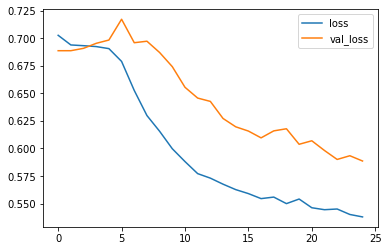

In [69]:
losses[['loss','val_loss']].plot()

### Evaluating model performance

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop = EarlyStopping(monitor = 'val_loss' , mode = 'min' , verbose =1, patience = 25)

Epoch 1/100
51/51 [==============================] - 3s 13ms/step - loss: 0.6986 - val_loss: 0.6232
Epoch 2/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6527 - val_loss: 0.6197
Epoch 3/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6226 - val_loss: 0.6023
Epoch 4/100
51/51 [==============================] - 0s 7ms/step - loss: 0.6006 - val_loss: 0.5732
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 0.5817 - val_loss: 0.5764
Epoch 6/100
51/51 [==============================] - 0s 7ms/step - loss: 0.5661 - val_loss: 0.5604
Epoch 7/100
51/51 [==============================] - 0s 7ms/step - loss: 0.5592 - val_loss: 0.5768
Epoch 8/100
51/51 [==============================] - 0s 7ms/step - loss: 0.5552 - val_loss: 0.5691
Epoch 9/100
51/51 [==============================] - 0s 7ms/step - loss: 0.5536 - val_loss: 0.5695
Epoch 10/100
51/51 [==============================] - 0s 7ms/step - loss: 0.5507 - val_loss: 0.5575
Epoch 11

<AxesSubplot:>

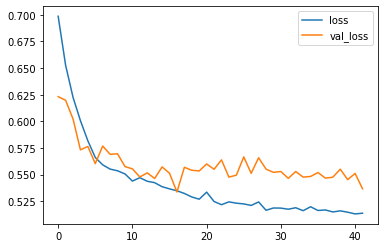

In [74]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam')
model.fit(X_train, y_train_sm, epochs = 100, batch_size=256, validation_data = (X_test, y_test) , callbacks = [Early_Stop])
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Predictions

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
predictions = model.predict(X_test)
pred_class = np.where(predictions > 0.5, 1, 0)
print(classification_report(y_test,pred_class))

60/60 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1611
           1       0.25      0.26      0.25       305

    accuracy                           0.76      1916
   macro avg       0.55      0.56      0.56      1916
weighted avg       0.76      0.76      0.76      1916



In [77]:
confusion_matrix(y_test,pred_class)

array([[1378,  233],
       [ 227,   78]], dtype=int64)

### Checking the Result

In [78]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df1.drop('not.fully.paid',axis=1).iloc[random_ind]
new_customer

credit_card           0.000000e+00
debt_consolidation    1.000000e+00
educational           0.000000e+00
home_improvement      0.000000e+00
major_purchase        0.000000e+00
small_business        0.000000e+00
credit.policy         0.000000e+00
int.rate              1.843000e-01
installment           6.910300e+02
dti                   2.012000e+01
fico                  6.620000e+02
days.with.cr.line     1.640042e+03
revol.bal             1.890000e+03
revol.util            1.910000e+01
inq.last.6mths        5.000000e+00
delinq.2yrs           4.000000e+00
pub.rec               0.000000e+00
annual_income         6.800000e+04
debt_amount           1.368160e+06
Name: 9521, dtype: float64

In [79]:
new_customer.isnull().any()

False

In [81]:
new_customer = new_customer.astype("float")
predictions = model.predict(new_customer.values.reshape(1,19))
pred_class = np.where(predictions > 0.5, 1, 0)
pred_class

1/1 [==============================] - 0s 76ms/step


array([[0]])

### Validating from the test data

In [82]:
df1.iloc[random_ind]['not.fully.paid']

0.0

#### Result: Our prediction is correct.